# Gradient descent

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

## 3D Graph of our cost function

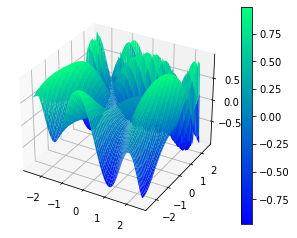

In [10]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

def f(x, y):
    return np.sin(1 / 2 * x ** 2 - 1 / 4 * y ** 2 + 3) * np.cos(2 * x + 1 - np.e ** y)
    #return x ** 2 + y ** 2

res = 100
x = np.linspace(-2.5, 2.5, res)
y = np.linspace(-2.5, 2.5, res)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.winter)
fig.colorbar(surf)

## Gradient descent

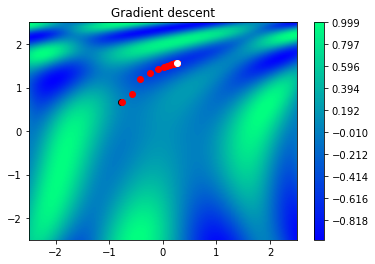

In [13]:
level_map = np.linspace(np.min(Z), np.max(Z), res)
plt.contourf(X, Y, Z, levels=level_map, cmap=cm.winter)
plt.colorbar()
plt.title('Gradient descent')

p = np.random.rand(2) * 4 - 2
plt.plot(p[0], p[1], 'o', c='k')

h = 0.01
lr = 0.01 # Learning rate

def derivate(cp, p):
    return (f(cp[0], cp[1]) - f(p[0], p[1])) / h

def gradient(p):
    grad = np.zeros(2)
    for idx, val in enumerate(p):
        cp = np.copy(p)
        cp[idx] = cp[idx] + h
        
        dp = derivate(cp, p)
        grad[idx] = dp
    
    return grad

for i in range(10000):
    p = p - lr*gradient(p)
    if(i % 50 == 0):
        plt.plot(p[0], p[1], 'o', c='r')

plt.plot(p[0], p[1], 'o', c='w')